In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') # 맑은 고딕으로 글꼴 설정하기
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 문제 해결하기
import seaborn as sns
from scipy import stats
import plotly.express as px

In [2]:
df = pd.read_csv('미니프로젝트-쇼핑몰 실습데이터 - 2019-01-01 ~ 2019-12-31.csv')
 
# 데이터 값이 개인정보인 데이터행 삭제
del df ['제작문구 내역']

# 할부기간이 없는 데이터값에 0 값 입력
df['할부기간'].fillna(0, inplace=True)

df

C:\Users\user\AppData\Local\Temp\ipykernel_1632\3189711851.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('미니프로젝트-쇼핑몰 실습데이터 - 2019-01-01 ~ 2019-12-31.csv')


,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-13,구매확정,N,0
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-16,구매확정,N,0
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,"67,500",신용카드,2019-12-16,구매확정,N,0
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,"30,000",신용카드,2019-12-16,구매확정,N,0
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,0
...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,"35,000",웰컴마일,2022-11-08,결제완료,Y,0
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,"26,900",웰컴마일,2022-11-08,결제완료,Y,0
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,"26,900",신 + 포,2022-11-08,배송준비,N,0
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,"4,050",포인트,2022-11-08,배송완료,N,0


# 1. 입점 기업별 RFM 분석(3그룹) 진행

### R : 얼마나 최근에 구매했는가 - 2019~2020 / 2021 / 2022 3그룹으로 분류

In [3]:
df['월별'] = df['주문일자'].apply(lambda x:str(x).split('-')[1]) # 주문일자 월별 컬럼 추가
df['연도별'] = df['주문일자'].apply(lambda x:str(x).split('-')[0]) # 주문일자 연도별 컬럼 추가

df['연도별'].unique()

array(['2019', '2020', '2021', '2022'], dtype=object)

In [4]:
def year(x):
    if x == '2022':
        return 3 # 가장 높은 점수 3점
    elif x == '2021':
        return 2 # 중간 점수 2점
    else:
        return 1 # 가장 낮은 점수 1점
    
df['R그룹'] = df['연도별'].apply(lambda x:year(x))
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,할부기간,월별,연도별,R그룹
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-13,구매확정,N,0,12,2019,1
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-16,구매확정,N,0,12,2019,1
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,"67,500",신용카드,2019-12-16,구매확정,N,0,12,2019,1
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,"30,000",신용카드,2019-12-16,구매확정,N,0,12,2019,1
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,0,12,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,"35,000",웰컴마일,2022-11-08,결제완료,Y,0,11,2022,3
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,"26,900",웰컴마일,2022-11-08,결제완료,Y,0,11,2022,3
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,"26,900",신 + 포,2022-11-08,배송준비,N,0,11,2022,3
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,"4,050",포인트,2022-11-08,배송완료,N,0,11,2022,3


In [5]:
df.groupby('업체명')['R그룹'].sum().sort_values(ascending=False)

업체명
다우기술       224619
지니         122805
쥬크박스        50074
에이스디포       18631
오피스퀵        15264
            ...  
한샘글로벌           9
와이앤제이           8
이선생자석교구         8
프린피아            8
에어인             3
Name: R그룹, Length: 89, dtype: int64

In [40]:
# fig = px.pie(df, values='R그룹', names='업체명',
#             title='입점 기업별 R분석')
# fig.show()

In [12]:
r = ('다우기술', '지니', '쥬크박스', '에이스디포', '오피스퀵', '한샘글로벌', '와이앤제이', '이선생자석교구', '프린피아', '에어인')
df['R'] = df['업체명'].apply(lambda x:x in r)
df_r = df[df['R'] == True]

In [41]:
# fig = px.pie(df_r, values='R그룹', names='업체명',
#             title='입점 기업별 R분석_10기업')
# fig.show()

### F : 얼마나 자주 구매했는가 - 100 이상 / 50 이상 / 50 미만 3그룹으로 분류 

In [14]:
df['주문수량'] = df['주문수량'].apply(lambda x:str(x).split(',')[0])
df['주문수량'] = df['주문수량'].apply(lambda x:int(x))

In [15]:
df['주문수량'].unique()

array([  1,   3,   2,   5,  15,   4,  32,   9,   8,  33,  25,   6,  20,
        50,  11,  10,   7,  12, 100,  22, 125,  24,  30,  18,  60,  40,
        28,  34,  21,  43,   0,  13,  16, 300, 150,  14,  70,  77,  52,
        17, 200,  51,  26,  35,  75,  29,  45,  80,  38, 135,  72,  47,
       130,  84,  19, 500, 117, 250,  36,  42,  23,  59,  90, 120,  62,
       156, 170,  48,  27,  54,  44,  88,  98,  92,  76,  53,  41,  31,
        65,  37,  58,  46, 400,  95,  68,  63, 410, 140,  39,  61,  93,
       197, 280, 195, 201,  55,  82,  71, 160,  66, 142, 122,  67,  64,
        85, 110,  49, 152], dtype=int64)

In [16]:
def fre(x):
    if x > 100:
        return 3 # 가장 높은 점수 3점
    elif x > 50:
        return 2 # 중간 점수 2점
    else:
        return 1 # 가장 낮은 점수 1점

In [17]:
df['F그룹'] = df['주문수량'].apply(lambda x:fre(x))
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,할부기간,월별,연도별,R그룹,R,F그룹
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-13,구매확정,N,0,12,2019,1,True,1
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,"67,500",신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,"30,000",신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,"35,000",웰컴마일,2022-11-08,결제완료,Y,0,11,2022,3,True,1
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,"26,900",웰컴마일,2022-11-08,결제완료,Y,0,11,2022,3,True,1
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,"26,900",신 + 포,2022-11-08,배송준비,N,0,11,2022,3,True,1
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,"4,050",포인트,2022-11-08,배송완료,N,0,11,2022,3,True,1


In [18]:
df.groupby('업체명')['F그룹'].sum().sort_values(ascending=False)

업체명
다우기술        85706
지니          61974
쥬크박스        18711
에이스디포        8388
오피스퀵         7173
            ...  
리체              4
프린피아            4
링커블테크놀러지        3
한샘글로벌           3
에어인             1
Name: F그룹, Length: 89, dtype: int64

In [42]:
# fig = px.pie(df, values='F그룹', names='업체명',
#             title='입점 기업별 F분석')
# fig.show()

In [20]:
f = ('다우기술', '지니', '쥬크박스', '에이스디포', '오피스퀵', '리체', '프린피아', '링커블테크놀러지', '한샘글로벌', '에어인')
df['F'] = df['업체명'].apply(lambda x:x in f)
df_f = df[df['F'] == True]

In [43]:
# fig = px.pie(df_f, values='F그룹', names='업체명',
#             title='입점 기업별 F분석_10기업')
# fig.show()

### M : 얼마나 많이 지출했는가 - 75% 이상 / 50% 이상 / 50% 미만 3그룹으로 분류

In [22]:
# 주문수량, 판매금액 데이터 인트형으로 변환
df['판매금액'] = df['판매금액'].apply(lambda x:x.replace(',', ''))
df['판매금액'] = df['판매금액'].apply(lambda x:int(x))

df['주문수량'] = df['주문수량'].apply(lambda x:str(x))
df['주문수량'] = df['주문수량'].apply(lambda x:x.replace(',', ''))
df['주문수량'] = df['주문수량'].apply(lambda x:int(x))

df['매출'] = df['주문수량']*df['판매금액']

In [23]:
df['판매금액'].describe()

count    2.186010e+05
mean     5.275901e+04
std      2.211658e+05
min      0.000000e+00
25%      3.600000e+03
50%      9.600000e+03
75%      2.790000e+04
max      1.980000e+07
Name: 판매금액, dtype: float64

In [24]:
def pay(x):
    if x > 2.790000e+04:
        return 3 # 가장 높은 점수 3점
    elif x > 9.600000e+03:
        return 2 # 중간 점수 2점
    else:
        return 1 # 가장 낮은 점수 1점

In [25]:
df['M그룹'] = df['판매금액'].apply(lambda x:pay(x))
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,할부기간,월별,연도별,R그룹,R,F그룹,F,매출,M그룹
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13,구매확정,N,0,12,2019,1,True,1,True,5000,1
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1,True,5000,1
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1,True,202500,3
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1,True,60000,3
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,0,12,2019,1,True,1,True,750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08,결제완료,Y,0,11,2022,3,True,1,True,35000,3
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08,결제완료,Y,0,11,2022,3,True,1,True,26900,2
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08,배송준비,N,0,11,2022,3,True,1,True,26900,2
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08,배송완료,N,0,11,2022,3,True,1,True,4050,1


In [26]:
df.groupby('업체명')['M그룹'].sum().sort_values(ascending=False)

업체명
다우기술        131998
지니          112541
에이스디포        21367
쥬크박스         21194
오피스퀵         17665
             ...  
링커블테크놀러지         9
리체               9
한샘글로벌            8
프린피아             4
에어인              2
Name: M그룹, Length: 89, dtype: int64

In [44]:
# fig = px.pie(df, values='M그룹', names='업체명',
#             title='입점 기업별 M분석')
# fig.show()

In [28]:
m = ('다우기술', '지니', '에이스디포', '쥬크박스', '오피스퀵', '링커블테크놀러지', '리체', '한샘글로벌', '프린피아', '에어인')
df['M'] = df['업체명'].apply(lambda x:x in m)
df_m = df[df['M'] == True]

In [45]:
# fig = px.pie(df_m, values='M그룹', names='업체명',
#             title='입점 기업별 M분석_10기업')
# fig.show()

# 2. 매출 시각화
### a. 월별, 연도별 매출
### b. 월별 순수익(처리 상황, 할부기간 고려)

In [30]:
df['처리상태'].unique() # 구매확정, 배송완료, 배송중, 결제완료

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [31]:
a = ('구매확정', '배송완료', '배송중', '결제완료')
df['구매'] = df['처리상태'].apply(lambda x:x in a)
df2 = df[df['구매'] == True]
df2

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,...,월별,연도별,R그룹,R,F그룹,F,매출,M그룹,M,구매
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13,구매확정,N,...,12,2019,1,True,1,True,5000,1,True,True
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16,구매확정,N,...,12,2019,1,True,1,True,5000,1,True,True
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16,구매확정,N,...,12,2019,1,True,1,True,202500,3,True,True
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16,구매확정,N,...,12,2019,1,True,1,True,60000,3,True,True
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,...,12,2019,1,True,1,True,750,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218595,221108103722743,다우기술,[신세계] 신세계 상품권-1만원권,신세계,1,9600,신용카드,2022-11-08,배송완료,N,...,11,2022,3,True,1,True,9600,1,True,True
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08,결제완료,Y,...,11,2022,3,True,1,True,35000,3,True,True
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08,결제완료,Y,...,11,2022,3,True,1,True,26900,2,True,True
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08,배송완료,N,...,11,2022,3,True,1,True,4050,1,True,True


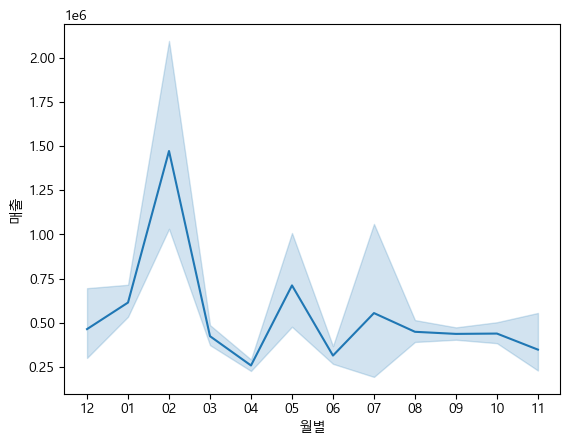

In [32]:
sns.lineplot(data=df2, x='월별', y='매출')
plt.show()

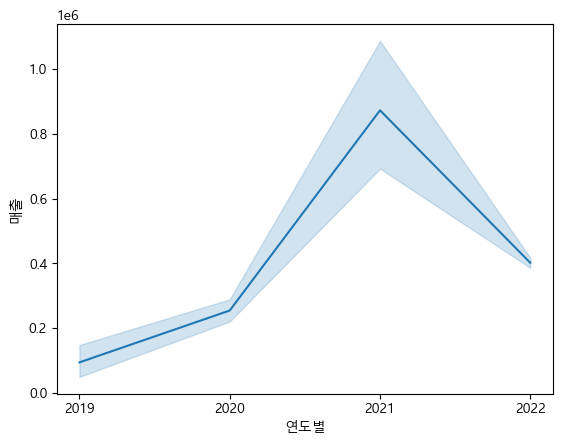

In [33]:
sns.lineplot(data=df2, x='연도별', y='매출')
plt.show()

# 3. 결제 방법에 따른 분석
### a. 결제 방법과 결제금액의 연관성 분석
### b. 결제 방법은 맨 앞의 한가지만 사용한 것으로 간주

In [34]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [35]:
df['결제방법'] = df['결제방법'].apply(lambda x:str(x))
df['결제방법_2'] = df['결제방법'].apply(lambda x:x.split(' +')[0])

In [36]:
df['결제방법_2'].unique()
# 신용카드, 가상계좌, 후불, 무통장입금, 포인트, 적립금, 웰컴마일, 정기결제, 현금간편결제

array(['신용카드', '가상계좌', '후불', '무통장입금', 'nan', '신', '포인트', '적', '웰컴마일',
       '적립금', '후', '정', '정기결제', '현금간편결제', '현', '-', ''], dtype=object)

In [37]:
def pay_m(x):
    if x.startswith('신'):
        return ('신용카드')
    elif x.startswith('가'):
        return ('가상계좌')
    elif x.startswith('후'):
        return ('후불')
    elif x.startswith('무'):
        return ('무통장입금')
    elif x.startswith('포'):
        return ('포인트')
    elif x.startswith('적'):
        return ('적립금')
    elif x.startswith('웰'):
        return ('웰컴마일')
    elif x.startswith('정'):
        return ('정기결제')
    elif x.startswith('현'):
        return ('현금간편결제')
    else:
        return ''

In [38]:
df['결제방법_2'] = df['결제방법_2'].apply(lambda x:pay_m(x))
df3 = df[df['결제방법_2'] != '']
df3

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,...,연도별,R그룹,R,F그룹,F,매출,M그룹,M,구매,결제방법_2
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13,구매확정,N,...,2019,1,True,1,True,5000,1,True,True,신용카드
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16,구매확정,N,...,2019,1,True,1,True,5000,1,True,True,신용카드
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16,구매확정,N,...,2019,1,True,1,True,202500,3,True,True,신용카드
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16,구매확정,N,...,2019,1,True,1,True,60000,3,True,True,신용카드
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,...,2019,1,True,1,True,750,1,True,True,신용카드
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08,결제완료,Y,...,2022,3,True,1,True,35000,3,True,True,웰컴마일
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08,결제완료,Y,...,2022,3,True,1,True,26900,2,True,True,웰컴마일
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08,배송준비,N,...,2022,3,True,1,True,26900,2,True,False,신용카드
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08,배송완료,N,...,2022,3,True,1,True,4050,1,True,True,포인트


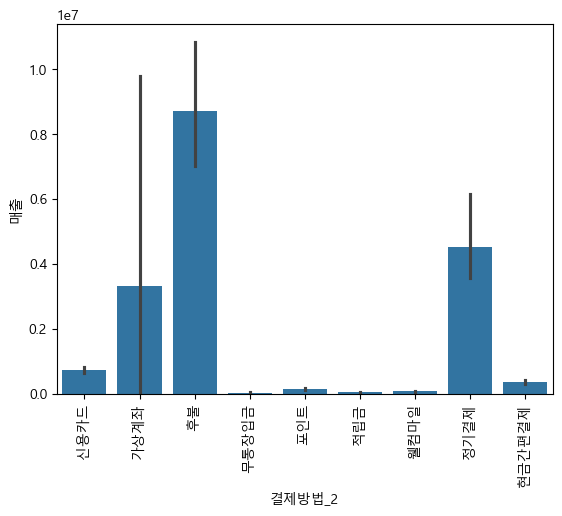

In [39]:
sns.barplot(data=df3, x='결제방법_2', y='매출')
plt.xticks(rotation=90)
plt.show()